In [17]:
#import the library used to query a website
import urllib.request
import pandas as pd
#specify the url
wiki = "https://en.wikipedia.org/wiki/Gal_Gadot"
#Query the website and return the html to the variable 'page'
page = urllib.request.urlopen(wiki)
#import the Beautiful soup functions to parse the data returned from the website
from bs4 import BeautifulSoup
#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(page, "lxml")

In [18]:
# find films table
right_table=soup.find('table', class_='wikitable sortable')

Question 1:

Collect all movies information and links from Gal Gadot Page
Taking care of rowspans in order to show information corectly

In [19]:
import re
# Generate lists
A = []
B = []
C = []
D = []
moviesLinks = [] # for Question2 movies links
#for rowspan
year = ''
role = ''
yearIndex = -1
roleIndex = -1

#go throw rows in movies table
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    # all cells - no prev rowspan
    if len(cells) == 5:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        # check rowspan in year
        if cells[0].has_attr('rowspan'):
            year = cells[0].find(text=True)
            yearIndex = int(cells[0].attrs['rowspan']) - 1
        # check rowspan in role
        if cells[2].has_attr('rowspan'):
            role = cells[2].find(text=True)
            roleIndex = int(cells[2].attrs['rowspan']) - 1
        # save link to movie page
        a = cells[1].find_all('a')
        if len(a) > 0:
            moviesLinks.append(a[0].get('href'))
    # year or role not exist
    if len(cells) == 4:
        # no year
        if yearIndex > 0:
            A.append(year)
            yearIndex = yearIndex - 1
            B.append(cells[0].find(text=True))
            C.append(cells[1].find(text=True))
            D.append(cells[2].find(text=True))
            # check role rowspan
            if cells[1].has_attr('rowspan'):
                role = cells[1].find(text=True)
                roleIndex = int(cells[1].attrs['rowspan']) - 1
            # save link to movie page
            a = cells[0].find_all('a')
            if len(a) > 0:
                moviesLinks.append(a[0].get('href'))
        if roleIndex > 0:
            A.append(cells[0].find(text=True))
            B.append(cells[1].find(text=True))
            C.append(role)
            D.append(cells[2].find(text=True))
            roleIndex = roleIndex - 1
            # check year rowspan
            if cells[0].has_attr('rowspan'):
                year = cells[0].find(text=True)
                yearIndex = int(cells[0].attrs['rowspan']) - 1
            # save link to movie page
            a = cells[1].find_all('a')
            if len(a) > 0:
                moviesLinks.append(a[0].get('href'))
    # year and role not in row
    if len(cells) == 3:
        A.append(year)
        B.append(cells[0].find(text=True))
        C.append(role)
        D.append(cells[1].find(text=True))
        yearIndex = yearIndex - 1
        roleIndex = roleIndex - 1
        # save link to movie page
        a = cells[0].find_all('a')
        if len(a) > 0:
            moviesLinks.append(a[0].get('href'))


In [20]:
# import pandas and convert list to data frame
pd.set_option('display.max_rows', 500)
df = pd.DataFrame()
df['Year'] = A
df['Title'] = B
df['Role'] = C
df['Director(s)'] = D
df

,Year,Title,Role,Director(s)
0,2009,Fast & Furious,Gisele Yashar,Justin Lin
1,2010,Date Night,Natanya,Shawn Levy
2,2010,Knight and Day,Naomi,James Mangold
3,2011,Fast Five,Gisele Yashar,Justin Lin
4,2013,Fast & Furious 6,Gisele Yashar,Justin Lin
5,2014,Kicking Out Shoshana,Mirit Ben Harush,Shay Kanot
6,2015,Furious 7,Gisele Yashar,James Wan
7,2016,Triple 9,Elena Vlaslov,John Hillcoat
8,2016,Batman v Superman: Dawn of Justice,Diana Prince,Zack Snyder
9,2016,Criminal,Jill Pope,Ariel Vromen


Question 2:

finding cast members in movie page:
* Under headline: "Cast"/"Voice Cast"
* All actors under one ul OR each actor in different ul
* Adding only actors with link

In [21]:
# find all cast
castLinks = []
# collect all cast members links
for link in moviesLinks:
    moviePage = urllib.request.urlopen("https://en.wikipedia.org" + link)
    movieSoup = BeautifulSoup(moviePage, "lxml")
    if (movieSoup.find(id="Cast")):
        cast = (movieSoup.find(id="Cast").parent).find_next('ul')
    if (movieSoup.find(id="Voice_cast")):
        cast = (movieSoup.find(id="Voice_cast").parent).find_next('ul')
    lines = cast.find_all('li')
    # cast members in different ul
    uls = False
    while (len(lines) == 1) and (cast.find_next('ul')):
        uls = True
        for line in lines:
            a = line.find_all('a')
            if len(a) > 0:
                castLinks.append(a[0].get('href'))
        cast = cast.find_next('ul')
        lines = cast.find_all('li')
    # all cast members in the same ul
    if uls == False:
        for line in lines:
            a = line.find_all('a')
            if len(a) > 0:
                castLinks.append(a[0].get('href'))

Collect information from each cast member and count duplicates - if information not exist put NULL

In [22]:
# find dups cast members and save count
A = []
B = []
C = []
D = []

castCount = dict()  # for Question 3 - number of films with gal gadot
for castMember in castLinks:
    if castMember != "/wiki/Gal_Gadot":
        try:
            actorPage = urllib.request.urlopen("https://en.wikipedia.org" + castMember)
            co_actor_soup = BeautifulSoup(actorPage, "lxml")
        except:  # page not open - take only actors with valid page
            continue
            
        #find actor vcard (information table) by different types of classes
        co_actor_vcard = co_actor_soup.find("table")
        try:
            co_actor_vcard = co_actor_soup.find("table", class_="infobox biography vcard")
        except:
            print()
        try:
            if (co_actor_vcard == None):
                co_actor_vcard = co_actor_soup.find("table", class_="infobox vcard plainlist")
        except:
            print()
        try:
            if (co_actor_vcard == None):
                co_actor_vcard = co_actor_soup.find("table", class_="infobox vcard")
        except:
            continue
        # find actor name - in class "fn" or if not exist in the next th
        if (co_actor_vcard != None):
            try:
                name = co_actor_vcard.find(class_="fn")
                if (name == None):
                    name = co_actor_vcard.find('th')
            except:
                name = co_actor_vcard.find('th')
        else:
            continue
        # dupes - add count
        try:
            nameT = name.text
        except:
            continue
        if name.text in castCount.keys():
            castCount[name.text] = castCount[name.text] + 1
        # first time - save info
        else:
            castCount[name.text] = 1
            #find birthday
            birthday = co_actor_vcard.find(class_="bday")
            #find birthplace - by class or at the end of the td split by ,
            birthplace = co_actor_vcard.find(class_="birthplace")
            if birthplace == None and birthday != None:
                birthplaceText = (birthday.parent.parent).get_text()
                if len((birthday.parent.parent).find_all('a'))==0:
                    arr=None
                else:
                    arr = birthplaceText.split(",")
            elif birthplace != None :
                arr = birthplace.text.split(",")
            else:
                arr=None
            try:
                A.append(name.text)
            except:
                A.append("NULL")
            try:
                B.append(birthday.text[:4])
            except:
                B.append("NULL")
            try:
                #ger country
                length = len(arr)
                country=arr[length - 1]
                r=re.compile('[^a-zA-Z. ]')
                country=r.sub('',country)
                C.append(country)
            except:
                C.append("NULL")
            awards = 0
            #get wins from tables
            awards = len(co_actor_soup.find_all(class_="yes table-yes2"))
            #get wins also from links
            awardsLink=co_actor_soup.find(href=re.compile("List_of_awards"))
            #if link exist
            if awardsLink is not None:
                #find the correct link
                awardsLink = awardsLink.get('href')
                #open awards page and count the wins
                awardsPage = urllib.request.urlopen("https://en.wikipedia.org" + awardsLink)
                awards_soup = BeautifulSoup(awardsPage, "lxml")
                temp1=len(awards_soup.find_all(text='Won'))
                temp2 = len(awards_soup.find_all(text='Won\n'))
                awards =awards+ temp1+temp2
            D.append(awards)

In [23]:
# create dataframe
df2 = pd.DataFrame()
df2['Name'] = A
df2['Birth Year'] = B
df2['Birth Country'] = C
df2['D']=D
df2

,Name,Birth Year,Birth Country,D
0,Vin Diesel,1967,U.S.,9
1,Paul Walker,1973,U.S.,3
2,Michelle Rodriguez,1978,United States,7
3,Jordana Brewster,1980,Panama,1
4,John Ortiz,1969,U.S.,0
5,Laz Alonso,1974,U.S.,0
6,Jack Conley,1958,U.S.,0
7,Shea Whigham,1969,U.S.,0
8,Tego Calderón,1972,U.S.,3
9,Don Omar,1978,U.S.,20


Question 3:

In [24]:
# create and show data frame for each co-actor number of films with gal gadot
coActorsDF = pd.DataFrame()
coActorsDF['Name'] = castCount.keys()
coActorsDF['# films with Gal Gadot'] = castCount.values()
coActorsDF

,Name,# films with Gal Gadot
0,Vin Diesel,4
1,Paul Walker,4
2,Michelle Rodriguez,3
3,Jordana Brewster,4
4,John Ortiz,2
5,Laz Alonso,1
6,Jack Conley,1
7,Shea Whigham,2
8,Tego Calderón,2
9,Don Omar,1


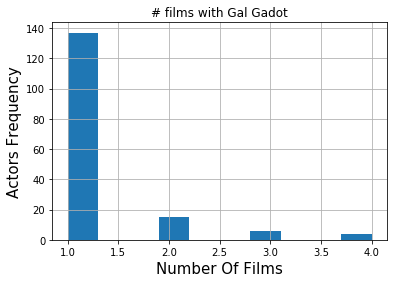

In [25]:
import matplotlib.pyplot as plt
# create histogram
fig = coActorsDF.hist(column="# films with Gal Gadot")
plt.xlabel("Number Of Films", fontsize=15)
plt.ylabel("Actors Frequency", fontsize=15)
plt.show(fig)